# 1. 영어 문서에서 자주 등장한 단어 시각화
## <이상한 나라의 앨리스>에서 단어 빈도를 막대 그래프와 워드 클라우드로 시각화
<br/>

In [1]:
from nltk.corpus import gutenberg

files = gutenberg.fileids()
print(files)

['austen-emma.txt', 'austen-persuasion.txt', 'austen-sense.txt', 'bible-kjv.txt', 'blake-poems.txt', 'bryant-stories.txt', 'burgess-busterbrown.txt', 'carroll-alice.txt', 'chesterton-ball.txt', 'chesterton-brown.txt', 'chesterton-thursday.txt', 'edgeworth-parents.txt', 'melville-moby_dick.txt', 'milton-paradise.txt', 'shakespeare-caesar.txt', 'shakespeare-hamlet.txt', 'shakespeare-macbeth.txt', 'whitman-leaves.txt']


In [2]:
# 앨리스 문서 불러오기
alice = gutenberg.open('carroll-alice.txt').read()
sample = alice[:500]

print(sample)

[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy an


In [6]:
# RegexpTokenizer로 토큰화

from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer("[\w']{3,}")    # 3글자 이상의 단어
tokens = tokenizer.tokenize(alice.lower())   # 대소문자 구분X

print(tokens[:30])

["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'down', 'the', 'rabbit', 'hole', 'alice', 'was', 'beginning', 'get', 'very', 'tired', 'sitting', 'her', 'sister', 'the', 'bank', 'and', 'having', 'nothing', 'once', 'twice', 'she', 'had', 'peeped']


In [7]:
# 불용어 제거
from nltk.corpus import stopwords

stopwords_eng = stopwords.words('english')

result_tokens = [word for word in tokens if word not in stopwords_eng]

print(result_tokens[:30])

["alice's", 'adventures', 'wonderland', 'lewis', 'carroll', '1865', 'chapter', 'rabbit', 'hole', 'alice', 'beginning', 'get', 'tired', 'sitting', 'sister', 'bank', 'nothing', 'twice', 'peeped', 'book', 'sister', 'reading', 'pictures', 'conversations', "'and", 'use', 'book', 'thought', 'alice', "'without"]


In [13]:
# 단어 빈도 수 세기
import pandas as pd

alice_count = pd.Series(result_tokens).value_counts().head(20)  # 상위 20개
print(alice_count)

said       462
alice      385
little     128
one         98
know        88
like        85
went        83
would       78
could       77
thought     74
time        71
queen       68
see         67
king        61
began       58
turtle      57
'and        56
way         56
mock        56
gryphon     55
dtype: int64


In [36]:
# 품사 태깅
# 명사, 동사, 형용사만 추출
tag_list = ['NN', 'VB', 'VBD', 'JJ']

import nltk
new_alice = [word for word, tag in nltk.pos_tag(result_tokens) if tag in tag_list]   # 명사, 동사, 형용사만 추출

alice_count = pd.Series(new_alice).value_counts().head(20)
print(alice_count)

hatter      40
looked      42
see         42
rabbit      42
got         44
gryphon     45
head        46
voice       48
thing       49
thought     54
mock        55
turtle      56
way         56
began       58
queen       66
time        71
went        83
little     124
alice      293
said       462
dtype: int64


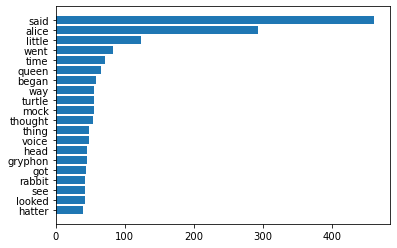

In [42]:
# 막대 그래프로 시각화
import matplotlib.pyplot as plt

reverse_sort = alice_count
freq = [item for item in alice_count]
plt.barh(range(len(reverse_sort)), freq, tick_label=reverse_sort.index)   # plt.barh(y크기, x축, tick_label)
plt.show()

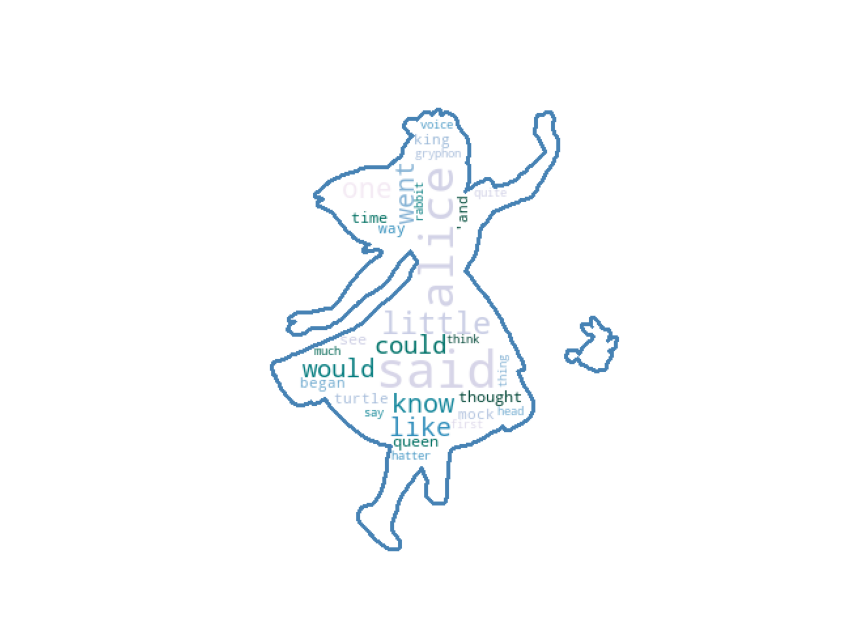

In [115]:
# 워드클라우드
from wordcloud import WordCloud

import numpy as np
from PIL import Image

import seaborn as sns
mask = np.array(Image.open("../alice_mask.png"))
alice_count = pd.Series(result_tokens).value_counts().head(30)  # 상위 30

wc = WordCloud(background_color = 'white',
              max_words=30,
              mask=mask,
              contour_width=3,
              contour_color='steelblue',
              colormap='PuBuGn')

wc.generate_from_frequencies(alice_count)

plt.figure(figsize=(15, 15))
plt.axis("off")
plt.imshow(wc)
plt.show()